## Libraries

In [2]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most I use.
#Seaborn works on top of matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# This library helps not to show the warnings
import warnings
warnings.filterwarnings("ignore")

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage

#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

## Import Data

In [3]:
# Load the data, contained in the customer data csv file.
df_segmentation = pd.read_csv('data/customersData.csv', index_col = 0)
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


## Explore Data
#### Descriptive analysis of the data set.

In [3]:
# first 5 rows of dataset
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
# Description statistics of data, will show the which shows some information
# Count --> the sum of the rows
# Mean -->The average of values in each column ( works for numerical values only)
# std -->
# Min --> the idea of distribution of data in some ranges
# Max --> The maximum numer of the column
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation Estimate

In [5]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
# If the number of correlation is closer to the 1 means the columns are more related and have impact on each other
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


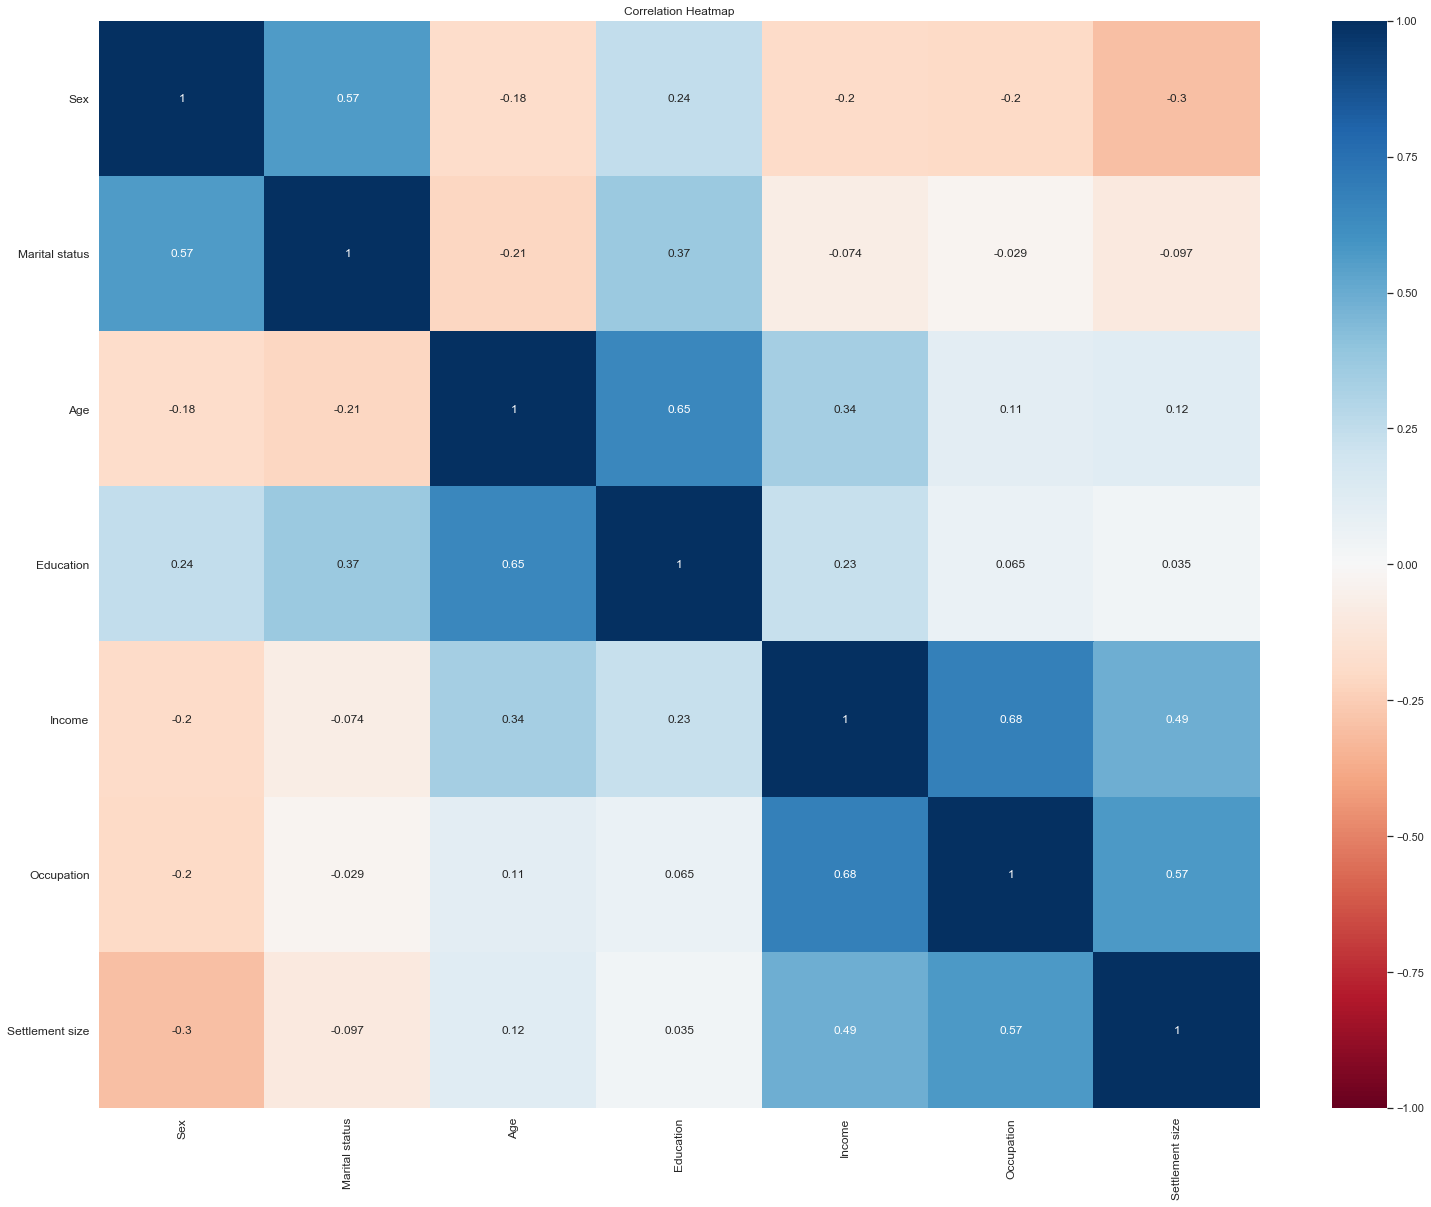

In [6]:
# I'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# I will use RdBu as a color scheme --> other colors schemes are ( Blues, YlGnBu or etc).
# I set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# In this case we can see the correlation between -0,25 to 0,68, as they are the minumum and maximum correlation indeces between the features.
plt.figure(figsize = (26, 20))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

##### By observation we can see the education and age are powerfully correlated (0.65) or Occupation and Settelment (0.57)

## Visualize Raw Data

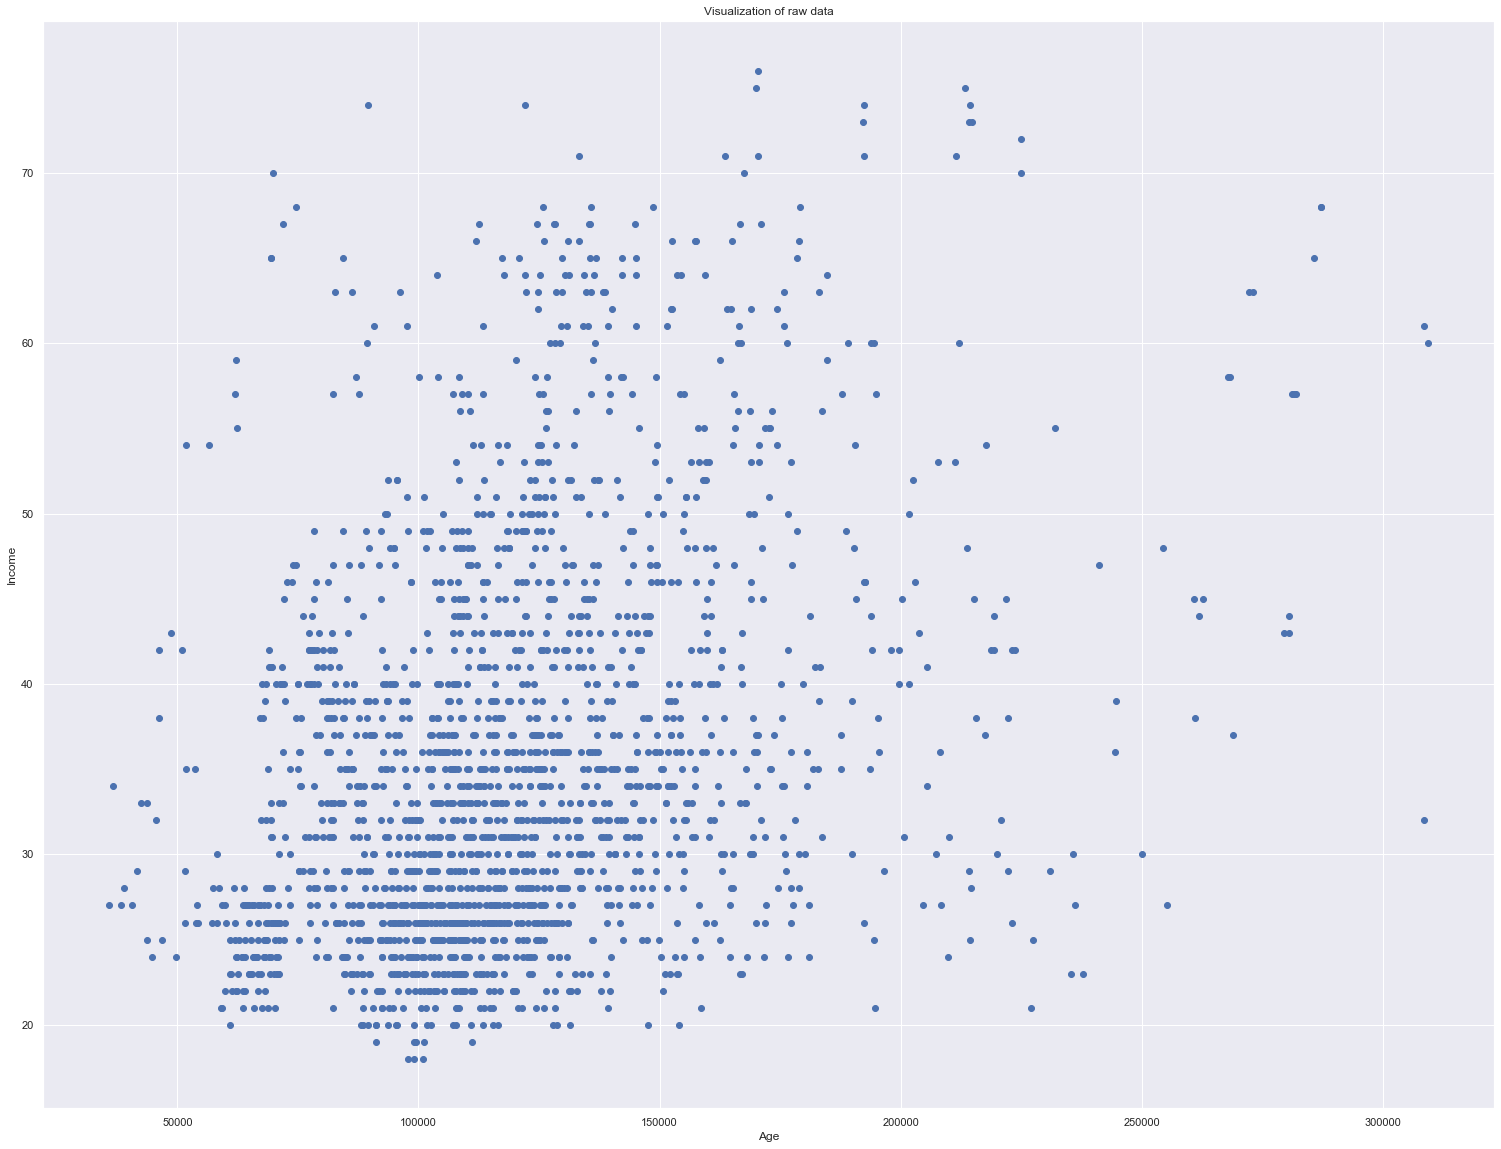

In [7]:
# I'll plot the data. We create a 12 by 9 inches figure.
# I have 2000 data points, which by scatter acrros Age and Income, located on positions 2 and 4 in my data set. 
plt.figure(figsize = (26, 20)) # setting the width and hight of the plot
plt.scatter(df_segmentation['Income'], df_segmentation['Age']) # name of the columns we want
# I could use the .iLoc method to get the columns name we need
# plt.scatter(df_segmentation.iloc[:,2], df_segmentation[:,4])
plt.xlabel('Age') # X-axis name
plt.ylabel('Income') # Y-axis name
plt.title('Visualization of raw data') # The plot title
plt.show()

## Standardization (Known as Scaling)

Standardizing data, so that all features have equal weight. This is important for modelling. \
Otherwise, in our case Income would be considered much more important than Education for Instance. \
I do not know if this is the case, so we would not like to introduce it to our model. \
This is what is also refered to as bias.

In [8]:
# Initiation 
scaler = StandardScaler()
# Fitting and Transform
segmentation_std = scaler.fit_transform(df_segmentation)

Now the data is scaled and all the features have the same weight

## ${\textbf{Hierarchical Clustering}}$

In [9]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std, method = 'ward')

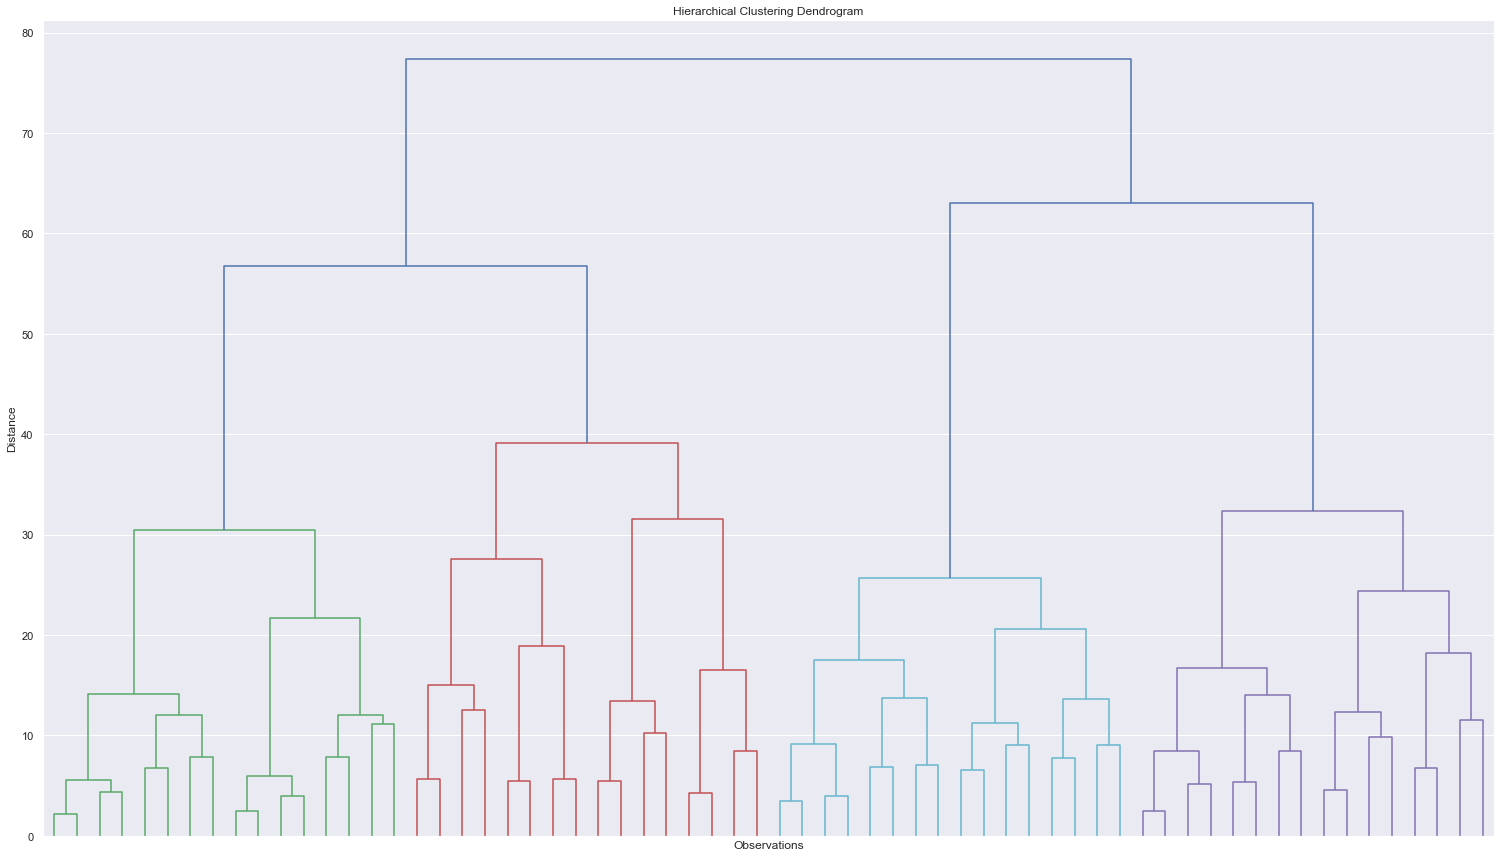

In [10]:
# I ploted the results from the Hierarchical Clustering using a Dendrogram. 

plt.figure(figsize = (26,15)) # plot size
plt.title('Hierarchical Clustering Dendrogram') # plot title name
plt.xlabel('Observations') # X-axis name
plt.ylabel('Distance') # Y-axis name

# ploting the linkage matrix
dendrogram(hier_clust,
           truncate_mode = 'level', # truncate the dendrogram for better readability.
           p = 5, # The level p shows only the last p merged clusters
           show_leaf_counts = False, # and also omit showing the labels for each point. 
           no_labels = True)
plt.show()

By implementing the hierarchical clustering and using the thumbs method we can see we have 4 cluter,\
usually we are using the Flat clustering.

I have choosed K-mean clustering, because its really easy, \
K-mean use Euclidean distance measurment, it has some issues if we cant find the best K for it, \
So I'm using the FOR loop to find the best K. \
I will use the WCSS to calculte, 
##### WCSS means :The sum of observation between in each cluster
##### K-means++ is an algorithm which runs before actual k-means to find the best starting point s for the centroids.

## K-means Clustering

Perform K-means clustering. I consider all dataset length clusters, so my for loop runs 10 iterations. \
In addition I run the algortihm at many different starting points - k means plus plus. \
And we set a random state for reproducibility.

i'm using random-stats to get the same result for each time the file being run

In [11]:
wcss = [] #The sum of observation between in each cluster
for i in range(1,11): # looping all dataset
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # init = K++ is using to find the best starting point each time
    kmeans.fit(segmentation_std) # fitting the model to the scales data
    wcss.append(kmeans.inertia_) #appending the wcss of inertia of into WCSS list

In [12]:
# the inertia
kmeans.inertia_

4308.1339469874565

Plot the Within Cluster Sum of Squares for the different number of clusters. \
From this plot I choose the number of clusters. \
We look for a K-value in the graphic, after which the descent of wcss isn't as pronounced.

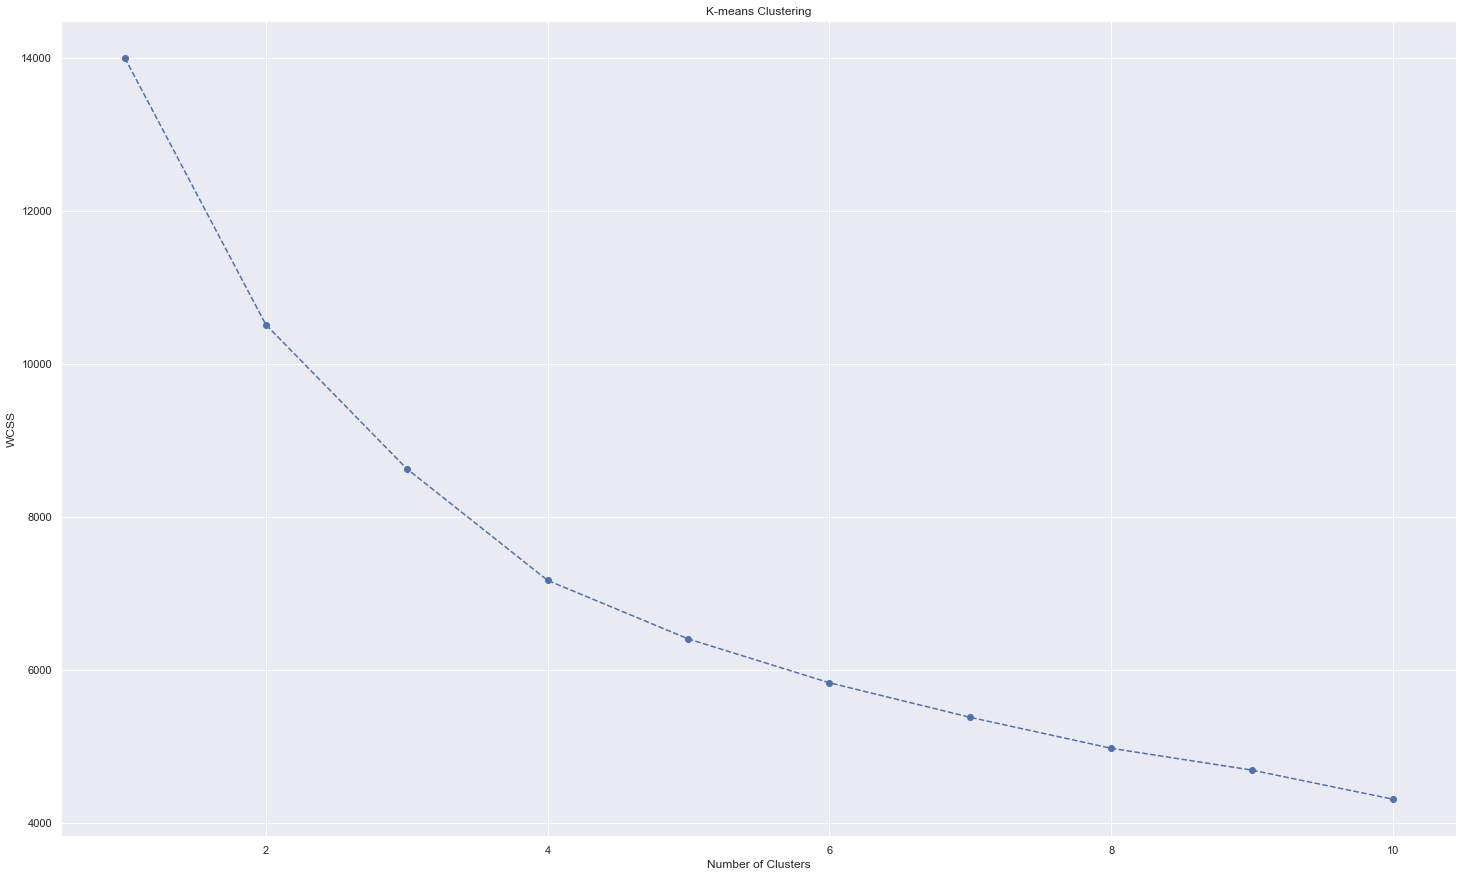

In [13]:
# ploting the WCSS list
plt.figure(figsize = (25,15)) # plot size
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--') # ploting the information and mark them by 'o'
plt.xlabel('Number of Clusters') # X-axis name
plt.ylabel('WCSS') # Y-axis name
plt.title('K-means Clustering') # plot title name
plt.show()

## The Elbow Method
This is probably the most well-known method for determining the optimal number of clusters. It is also a bit naive in its approach. \
Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, \
and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

####  Number of clusters. In my case 4 by elbow method.

## The Silhouette Method:
The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). \
The range of the Silhouette value is between +1 and -1. \
A high value is desirable and indicates that the point is placed in the correct cluster. \
If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

In [14]:
# importing the silhouette_score
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(segmentation_std)
  labels = kmeans.labels_
  sil.append(silhouette_score(segmentation_std, labels, metric = 'euclidean'))

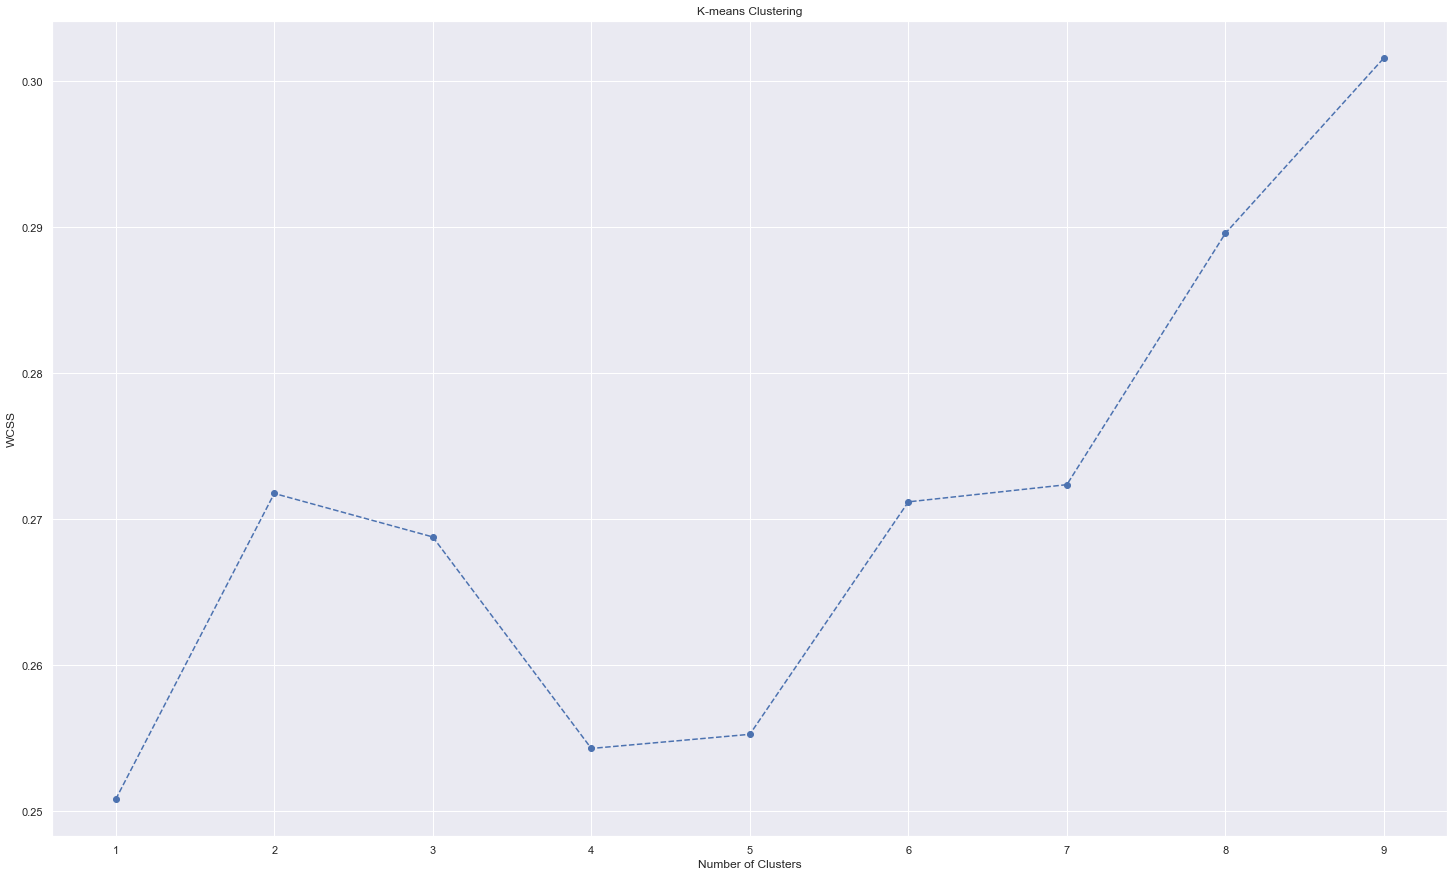

In [15]:
# ploting the SIL list
plt.figure(figsize = (25,15)) # plot size
plt.plot(range(1,10), sil, marker = 'o', linestyle = '--') # ploting the information and mark them by 'o'
plt.xlabel('Number of Clusters') # X-axis name
plt.ylabel('WCSS') # Y-axis name
plt.title('K-means Clustering') # plot title name
plt.show()

The Silhouette Score reaches its global maximum at the optimal K. \
This should ideally appear as a peak in the Silhouette Value-versus-k plot.
####  Number of clusters. In my case 3 by silhouette score method.

but I'm going to use the Elbow method, so K-value is equal to 4 

In [16]:
# init the k-mean with 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [17]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

[[ 0.09013622  0.39104     1.68945241  1.81991857  0.98122555  0.49931674
   0.45703895]
 [-0.20914716 -0.95406234 -0.02825748 -0.48571087 -0.60616779 -0.75418998
  -0.85643827]
 [-0.8575279  -0.6456474  -0.02337839 -0.5080912   0.53186888  0.72275988
   0.9648882 ]
 [ 0.79675328  1.00135077 -0.59283028  0.05017279 -0.39883413 -0.27639384
  -0.38938019]]


In [18]:
# Get the cluster labels
K_labels = kmeans.labels_
K_labels

array([0, 3, 1, ..., 1, 3, 1], dtype=int32)

In [19]:
#The predictions
y_kmeans = kmeans.predict(segmentation_std)
y_kmeans

array([0, 3, 1, ..., 1, 3, 1], dtype=int32)

### Analysis and Results

To analys what we have done and meaning of it first im going to make some new columns. \
By new column we can see visually see each indivisual and the cluster that been given to it.

In [20]:
# I'm going to create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,1


To get insigt it better to see the mean of the each cluster, \
to do so we have to choose the column name that the clusters are and use the groupby method.

In [21]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


# we have 4 groups and information about them which i'm going to explain them: 

##### Second group (Cluster 0):
* It been divided to female and male equally, most of them are in relationships, with average age of 55 years old (they are the oldest group), thay have a  highest value of education with the high value of income and occupation, majority of them lives in big or middle size cities.
#### I'm going to assign this cluster to "Well-off".

##### First group (Cluster 1):
* Two third of them are men, allmost all of them are single, with average age of 35 years old, thay have a relativly low value of education with the low values of income and occupation and majority of them lives in small size cities.
#### I'm going to assign this cluster to "Fewer-opportunity".

##### Second group (Cluster 2):
* Most people are mens, most of them are singles, with average age of 35 years old, thay have a reletivly low value of education with the high values of income and occupation and majority of them lives in big size cities.
#### I'm going to assign this cluster to "Carrier-Focused".

##### Second group (Cluster 3):
* Most of them are female, most of them are in relationship, with average age of 28 years old (they are the youngest group), thay have a relativly high value of education with the medium value of income and occupation, majority of them lives in middle size cities.
#### I'm going to assign this cluster to "Standard".


Lets see the size of the clusters and proportions of each against all dataset

In [22]:
# Compute the size and proportions of the four clusters
# In the groupby statment we have to add a secound columns for counting, it can be any one I used SEX
df_segm_analysis['Number_Observation'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
# Adding the column to show the proportion of the each cluster
df_segm_analysis['Proportion_Observation'] = df_segm_analysis['Number_Observation'] / df_segm_analysis['Number_Observation'].sum()

In [23]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number_Observation,Proportion_Observation
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


Ok, lets change them name of each cluster to what I decided

In [24]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'career focused',
                         3:'standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number_Observation,Proportion_Observation
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


#### So we can see thet the majoroty of people are in Standard group, and the smallest group is well-off with 263 people in it.

Ok, lets plot our new data to see what we have

In [25]:
# Add the segment labels to the table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                         1:'fewer-opportunities',
                         2:'career focused',
                         3:'standard'})

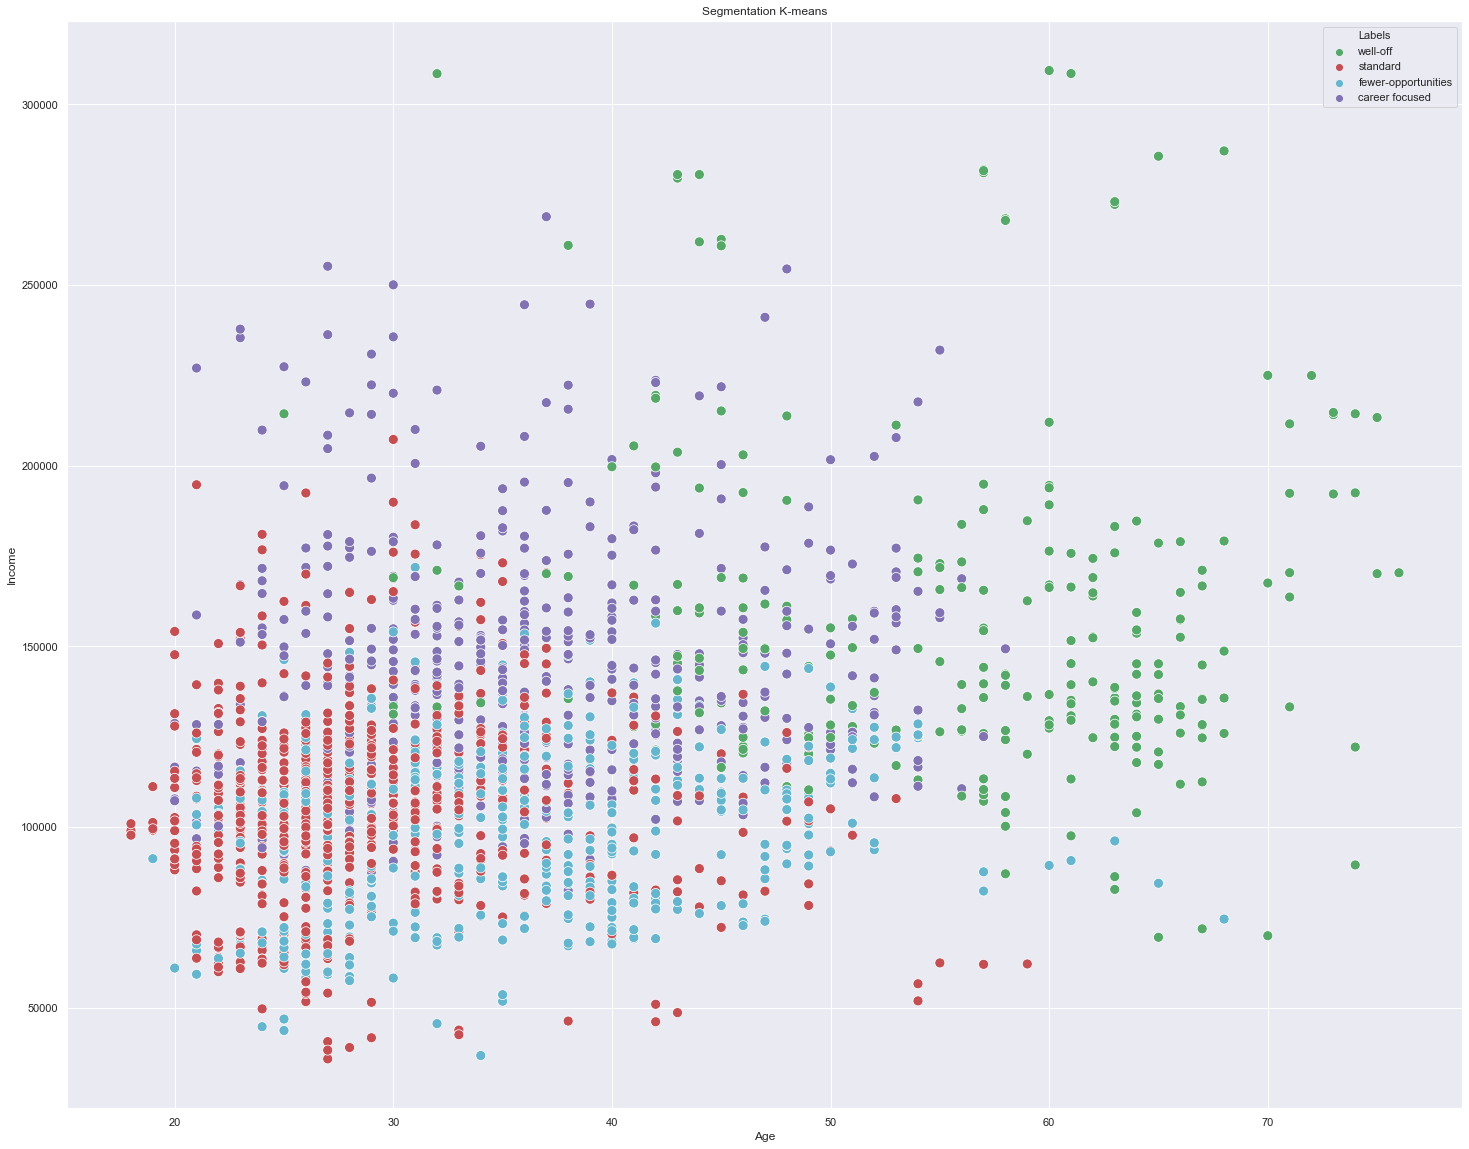

In [26]:
# plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (25, 20))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'], s=100)
plt.title('Segmentation K-means')
plt.show()

#### We can see the green that the well-off segment is separated from other but unfortunately other three groups can not be clearly found it the plot 
#### K-mean did the perfect job to separate the segments but its not good enogh to make a insight, 
#### so i'm going to use Principal component analysis (PCA) on the data to Reduce Dimensionality


### ${\textbf{PCA}}$

Principal Component Analysis (PCA) is done most commonly with the following goals:

Dimension Reduction
Removing Multicollinearity

In [27]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [28]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Now we can see that we got 7 components for PCA which some have the big proportion of data and some almost none. \
first one = 36%
Second = 26% 

if we add all of them will be 100% ( all of data )

#### Plot the cumulative variance explained by total number of components. \
On this graph we choose the subset of components I want to keep. \
Generally, I want to keep around 80 % of the explained variance.

Text(0, 0.5, 'Cumulative Explained Variance')

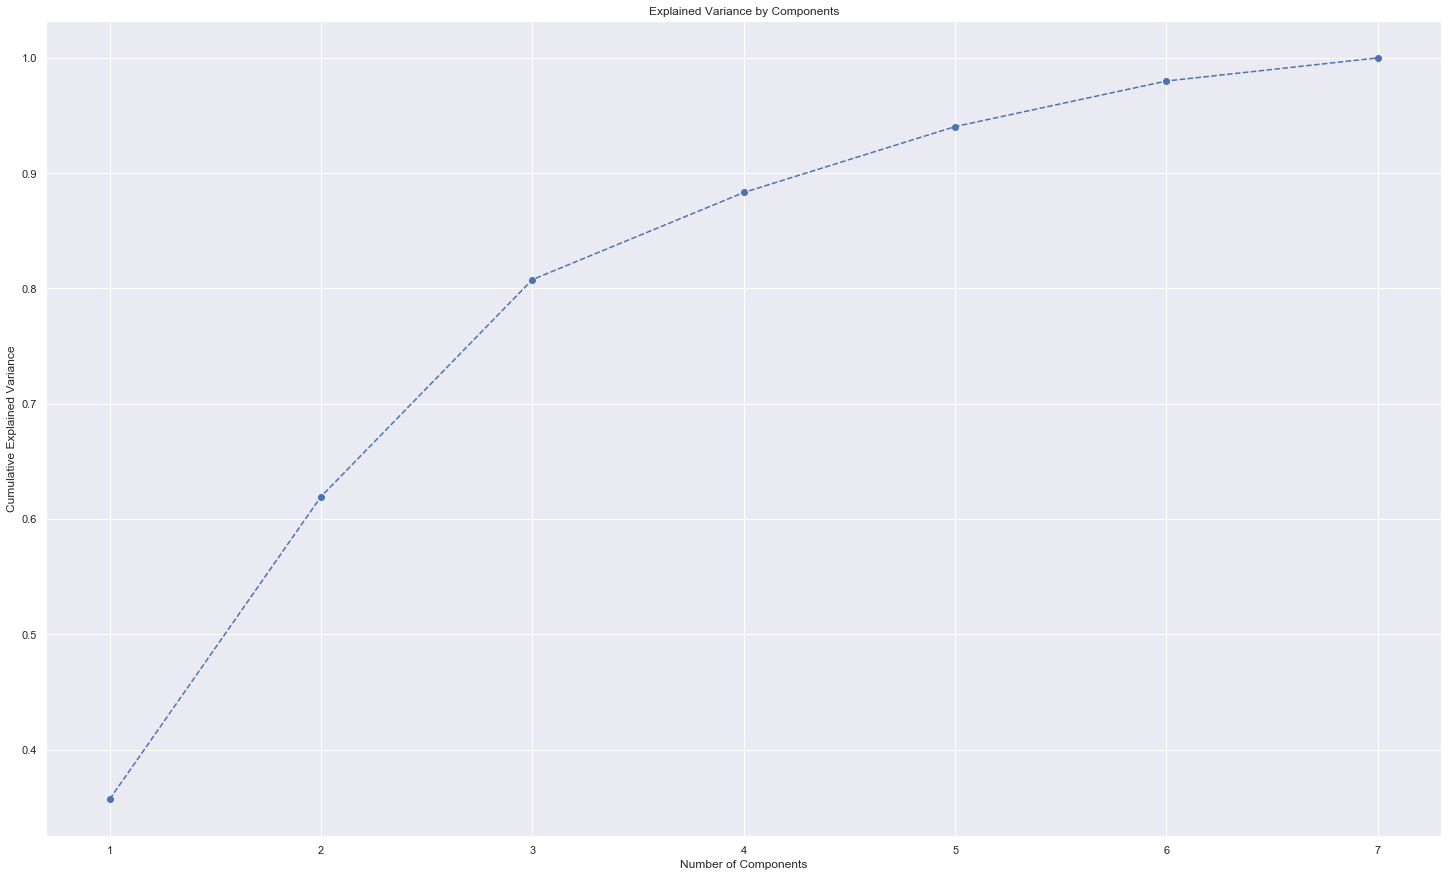

In [30]:
plt.figure(figsize = (25,15))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

By analyzing the plot we can see the number of 3 is the best number of components for PCA, (rile of thumb :keep 80% of the variance) \
Now I'm going to performe the PCA again with the best PCA

In [31]:
# I choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [32]:
#Fit the model the data with the selected number of components.
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### PCA Results

#### The components attribute shows the loadings of each component on each of the seven original features. 

In [33]:
# the correlation of PCA
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

#### The loadings are the correlations between the components and the original features.

lets see the data in the dataframe to be more understandable

In [34]:
# creating the dataframe with our information
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


As we can see the values are between -1 and 1 (correlation), lets visualize the data to see them better.

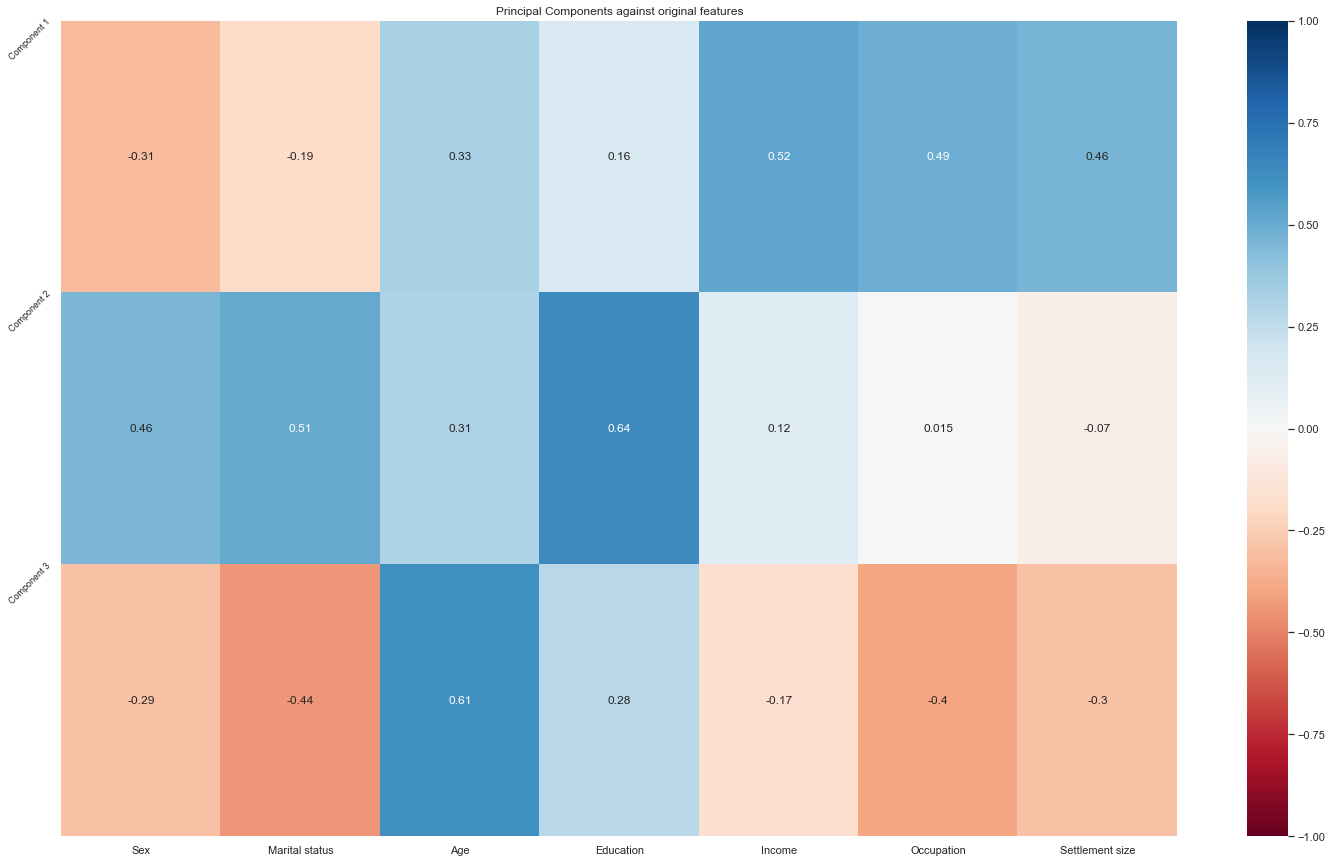

In [35]:
# Heat Map for Principal Components against original features.  
plt.figure(figsize=(25,15))
sns.heatmap(df_pca_comp, 
            vmin = -1, # minimum value
            vmax = 1, # maximum value
            cmap = 'RdBu', # RdBu color scheme
            annot = True) # showing the anotations 
plt.yticks([0, 1, 2],  # ploting the components and rotate them by 45 deg.
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)
plt.title('Principal Components against original features')
plt.show()

#### The explanation of the heatmap:
##### First component:
There is a positives correlation between 'Age, Income, Occupation and Settlement size' it seems thay are related to 'Carriers'

##### Second component:
This component has the correlation between 'Sex, Marital Status and education' so i can gusse that this one more related to education and 'LIFE STYLE'

##### Third component:
The 'Age, marital status and occupation' have correlated which means its related to 'Work Experiences' 

No i'm going to transform our PCA to the scaled dataset

In [36]:
#transforming the PCA to dataset
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [37]:
# saving the PCA score
scores_pca = pca.transform(segmentation_std)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

#### now lets do the K_MEAN clustering again with new data

### ${\textbf{K-means clustering with PCA}}$

In [38]:
# Fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Ok, lets plot

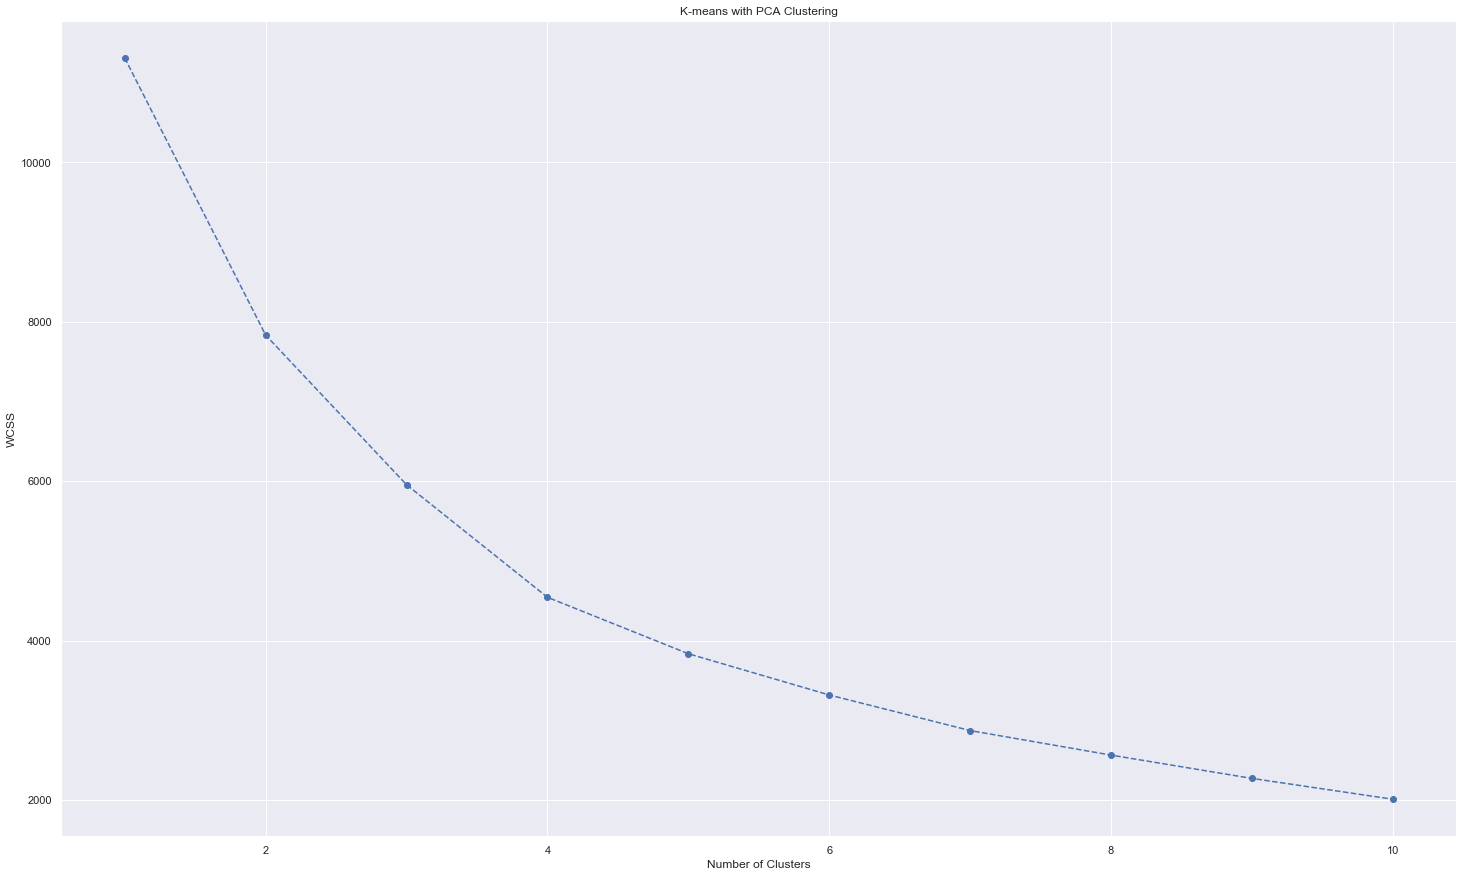

In [39]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model.
# Again it looks like four is the best option.
plt.figure(figsize = (25,15))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [40]:
# Same initializer and  as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [41]:
# fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

##### Now lets analyzing the results
### K-means clustering with PCA Results

I'm going to create a new dataframe by concating the PCA Scores for each component to out first dataset.

In [42]:
# create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [43]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


To get some insight lets get mean of Segmentation by PCA

In [44]:
# calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


### Result interpretation 

Now we can see the new mean for our clusters are a bit different from what we got earlier.

##### We had 4 groups earlier without implementing PCA:

##### Segment 0: 'Well Off' 

##### Segment 1: 'Fewer Opportunities'

##### Segment 2: 'Carrier Focus'

##### Segment 3: 'Standard'

##### now let see if we can get the same result as before for our segments.

Ok, lets interpret the what we got by calculating the means by segment:

The first component (Component 1) was related to 'Carrier', second is related to 'Life Style' and the third one related to 'life or work Experience'. 
#### Therefore:

##### First cluster (Cluster 0) seems to be 'Weel Off':
Has HIGH values in Carrier, HIGH values in life style and HIGH values regarding the life or work Experience.

##### Second cluster (Cluster 1) seems to be 'Fewer Opportunities':
Has LOW values in Carrier, LOW values in life style and HIGH values regarding the life or work Experience.

##### Third cluster (Cluster 2) seems to be 'Standard':
Has LOW values in Carrier, Medium to HIGH values in life style and LOW values regarding the life or work Experience.

##### Forth cluster (Cluster 3) seems to be 'Carrier Focused':
Has HIGH values in Carrier, LOW values in life style and LOW values regarding the life or work Experience,






## Let see how many people belongs to each cluster ( the segments name will be the segmentation which we analyzed )

In [45]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['Number_Observation'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Proportion_Observation'] = df_segm_pca_kmeans_freq['Number_Observation'] / df_segm_pca_kmeans_freq['Number_Observation'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'well off', 
                                                          1:'fewer opportunities',
                                                          2:'Standard', 
                                                          3:'career focused'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Number_Observation,Proportion_Observation
Segment K-means PCA,,,,,,,,,,,,
well off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
fewer opportunities,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
Standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


### Lets analyse the results
#### The biggest group is our "Standard" group which means 23% percentage of our dataset by having a 694 person.
#### Next we have 583 person in "Carrier Focused" segment which means 29% percentage of our dataset.
#### The third one will be "Fewer opportunities" group with 459 person which means 35% percentage of our datasetand. 
#### The smallest group is "Well Off" with population of 264 which means 13% percentage of our datasetand. 


In [46]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'well off', 
                                                          1:'fewer opportunities',
                                                          2:'Standard', 
                                                          3:'career focused'})

Lets plot the results

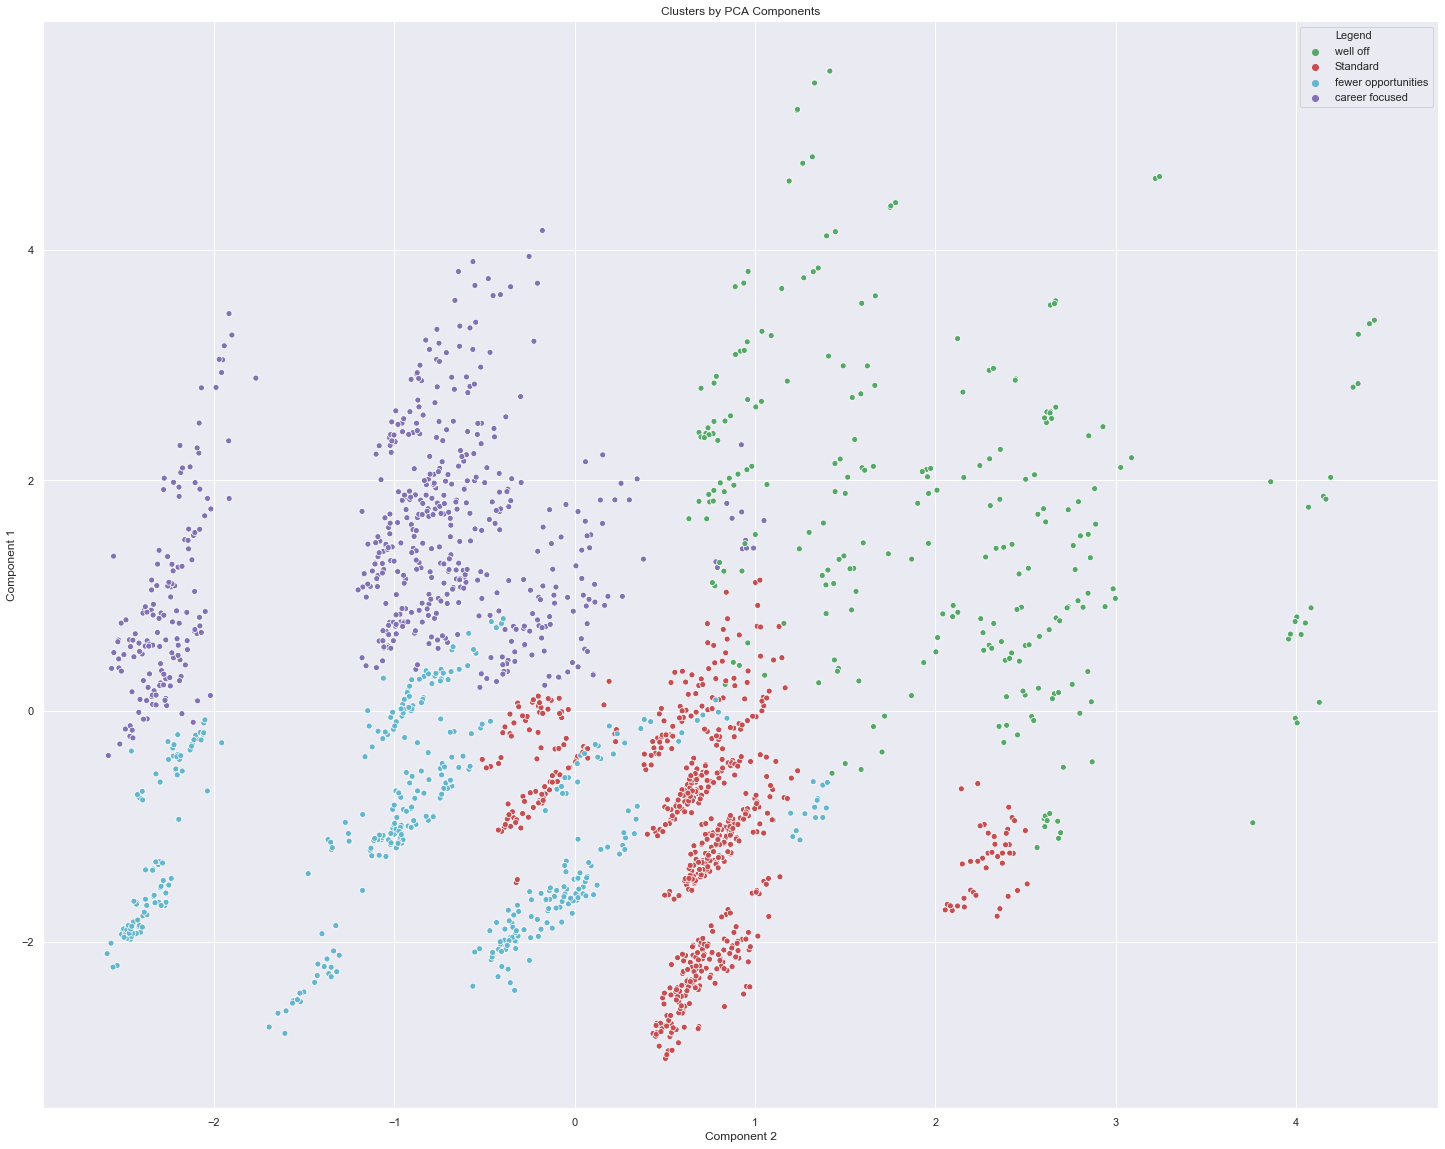

In [47]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
# i used the first and second components which have the most importancy 
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (25, 20))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

### Analysing the graph

We can see the Green dots completely separated and shows our "Well Off" segment, \
The "Carrier Focused" group is separated on to left of the graph, \
"Standard" and "Fewer Opportunities" groups are at the center and thay have a bit overlapping.



I'm going to export the data to use in further analysis such as "Purchase"

### Data Export

In [48]:
# export them as pickle objects.
# the Scaler
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [49]:
# the PCA
pickle.dump(pca, open('pca.pickle', 'wb'))

In [50]:
# the Keamns-PCA
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

Now we can start doing the purchase analysis 